In [3]:
import numpy as np
#import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydotplus as pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [5]:
def model(input_shape):  
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!  
    X_input = Input(input_shape)  

    # Zero-Padding: pads the border of X_input with zeroes  
    X = ZeroPadding2D((3, 3))(X_input)  

    # CONV -> BN -> RELU Block applied to X  
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)  
    X = BatchNormalization(axis = 3, name = 'bn0')(X)  
    X = Activation('relu')(X)  

    # MAXPOOL  
    X = MaxPooling2D((2, 2), name='max_pool')(X)  

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED  
    X = Flatten()(X)  
    X = Dense(1, activation='sigmoid', name='fc')(X)  

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.  
    model = Model(inputs = X_input, outputs = X, name='HappyModel')  

    return model

In [6]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
    X_input = Input(shape=input_shape)
    X = ZeroPadding2D(padding=(1, 1))(X_input)
    X = Conv2D(8, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(16, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    X = ZeroPadding2D(padding=(1, 1))(X)
    X = Conv2D(32, kernel_size=(3,3), strides=(1,1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)
    
    # FC
    X = Flatten()(X)
    Y = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs = Y, name='HappyModel')
    ### END CODE HERE ###
    
    return model

In [7]:
### START CODE HERE ### (1 line)
happyModel = HappyModel((64, 64, 3))
### END CODE HERE ###

In [8]:
### START CODE HERE ### (1 line)
import keras
happyModel.compile(optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])
### END CODE HERE ###

In [9]:
### START CODE HERE ### (1 line)
happyModel.fit(x=X_train, y=Y_train, batch_size=16, epochs=20)
### END CODE HERE ###

Epoch 1/20
38/38 [==============================] - 1s 20ms/step - loss: 0.5525 - accuracy: 0.7400
Epoch 2/20
38/38 [==============================] - 1s 21ms/step - loss: 0.2318 - accuracy: 0.9283
Epoch 3/20
38/38 [==============================] - 1s 23ms/step - loss: 0.1523 - accuracy: 0.9633
Epoch 4/20
38/38 [==============================] - 1s 21ms/step - loss: 0.1139 - accuracy: 0.9817
Epoch 5/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0910 - accuracy: 0.9800
Epoch 6/20
38/38 [==============================] - 1s 21ms/step - loss: 0.0710 - accuracy: 0.9917
Epoch 7/20
38/38 [==============================] - 1s 22ms/step - loss: 0.0727 - accuracy: 0.9817
Epoch 8/20
38/38 [==============================] - 1s 20ms/step - loss: 0.0475 - accuracy: 0.9950
Epoch 9/20
38/38 [==============================] - 1s 19ms/step - loss: 0.0421 - accuracy: 0.9933
Epoch 10/20
38/38 [==============================] - 1s 23ms/step - loss: 0.0297 - accuracy: 0.9967
Epoch 11/

In [10]:
### START CODE HERE ### (1 line)
preds = happyModel.evaluate(x=X_test, y=Y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 15ms/step - loss: 0.1064 - accuracy: 0.9400

Loss = 0.10641790926456451
Test Accuracy = 0.9399999976158142


[[1.]]


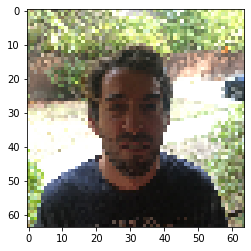

In [11]:
### START CODE HERE ###
img_path = 'my_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))